# **Coronary Heart Diease Project Paper**
##*Predictive modeling of CHD*

Anwita Molaka, Emily Rothrock, Livvy Yurish, Sophie Phillips



# **Summary**


Coronary Heart Disease (CHD) is a type of heart disease where the arteries fail to deliver enough oxygenated blood to the heart, possibly leading to symptoms ranging from chest pain to heart attacks. It is usually caused by a build-up of plaque in the vessel wall that causes the coronary arteries to narrow, limiting blood flow. The purpose of this project is to build a predictive algorithm that can predict the likelihood a person develops CHD.


These models will be built using a subset of data from the Framingham Heart Study, split into a training and testing set. Tools learned in class such as k nearest neighbor, linear regression, and decision trees were explored to assess which model was the most viable. Through cleaning data, transforming variables, and building models, we attempted to uncover the highest possible R-squared value, or the model that is most suitable for a clinical setting. The idea of this approach is to train the model on the variable attributes/factors most correlated with developing CHD. Then, the model will be tested on its accuracy of prediciting the risk of CHD from an input of those specific variables from a different testing dataset.


Results: After running these various models, we found that _____ performed the best, with an R-squared value of _____ (or RMSE). This model used _____(variables/method) to predict the risk of CHD.



# **Data**

The data included the following 16 variables:

* sex : the recorded sex of the observationsm with 1 denoting an participant
coded as male
* age : Age at the time of medical examination in years.
* education: A categorical variable of the participants education, with the levels: Some high school (1), high school/GED (2), some college/vocational school (3), college (4)
* currentSmoker: Current cigarette smoking at the time of examinations
* cigsPerDay: Number of cigarettes smoked each day
* BPmeds: Use of Anti-hypertensive medication at exam
* prevalentStroke: Prevalent Stroke (0 = free of disease)
* prevalentHyp: Prevalent Hypertensive. Subject was defined as hypertensive if treated
* diabetes: Diabetic according to criteria of first exam treated
* totChol: Total cholesterol (mg/dL)
* sysBP: Systolic Blood Pressure (mmHg)
* diaBP: Diastolic blood pressure (mmHg)
* BMI: Body Mass Index, weight (kg)/height (m)^2
* heartRate: Heart rate (beats/minute)
* glucose: Blood glucose level (mg/dL)
* TenYearCHD : The 10 year risk of coronary heart disease(CHD)

After further looking at these variables, the data could be categorized to a combination of behavioral variables, clinical attributes, and the 10 year risk of developing CHD. After categorizing these variables, it seems best to predict based on clinical attributes, rather than behavioral ones because that can be complicated as they can be intercorrelated with other clinical attributes.

## Key Variables

The key variables used for modeling were determined by first finding which were most strongly correlated.
The highest correlations were found to come from age, prevalentHyp, sysBP, glucose, diaBP and totChol, with the highest being age and sysBP. The 4 most strongly correlated varibles with TenYearCHD were:

*   Age (.235883)
*   prevalentHyp (0.220643)
* sysBP (0.251709)
* diaBP ((0.180052)

These specifc variables were the ones that we further analyzed when going on to create the models.

## Analysis Preparation and Challenges

While cleaning the data, getting rid of NaN values were the only changes made.
To transform the variables, logarithmic normalization was performed

- *INSERT any other challenges u faced*


# **Results**

## kNN Model

When performing the kNN model, the highest correlations were found to come from age, prevalentHyp, sysBP, glucose, diaBP and totChol. The optimal k value was found to be 39 using the elbow method. Using those variables and the optimal k value as the number of neighbors, the kNN model was run on those parameters. The resulting kNN score was found to be 0.05853.

* INSERT explanation on results interpretation/implications



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

In [ ]:
train_data = pd.read_csv('fhs_train_cleaned.csv')
train_data = train_data.drop('Unnamed: 0',axis=1)

In [ ]:
test_data = pd.read_csv('fhs_test.csv')
test_data = test_data.rename(columns={'TenYearCHD': 'TEN_YEAR_CHD'})
test_data = test_data.drop('Unnamed: 0',axis=1)
test_data = test_data[~test_data.isnull().any(axis=1)] # gets rid of all rows with np.nan values
test_data

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TEN_YEAR_CHD
1,0,51,3.0,0,0.0,0.0,0,0,0,264.0,135.0,83.0,26.68,60.0,74.0,0
4,1,58,2.0,1,20.0,0.0,0,0,0,207.0,110.0,80.0,23.55,78.0,78.0,0
5,1,53,1.0,0,0.0,0.0,0,1,0,202.0,140.5,90.0,25.82,85.0,74.0,0
6,1,41,2.0,1,5.0,0.0,0,0,0,218.0,129.5,93.0,27.80,58.0,83.0,0
7,1,50,4.0,1,35.0,0.0,0,0,0,236.0,102.0,69.0,21.98,70.0,73.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,0,54,1.0,1,20.0,0.0,0,0,0,274.0,116.0,79.0,24.77,72.0,65.0,0
1055,0,63,2.0,0,0.0,0.0,0,1,0,184.0,196.0,101.0,28.27,86.0,82.0,1
1056,1,42,4.0,0,0.0,0.0,0,0,0,195.0,112.0,74.5,23.37,58.0,110.0,0
1057,1,63,3.0,0,0.0,0.0,0,1,0,161.0,196.0,102.0,28.43,56.0,88.0,0


In [ ]:
test_data.corr()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TEN_YEAR_CHD
sex,1.000000,-0.008184,0.059335,0.209998,0.310308,-0.074139,-0.056433,-0.025371,0.004769,-0.051571,-0.084723,0.031030,0.064621,-0.128771,-0.025377,0.063633
age,-0.008184,1.000000,-0.139154,-0.205061,-0.170595,0.154252,0.032935,0.343572,0.145716,0.265086,0.393690,0.206948,0.118287,0.021491,0.158242,0.235883
education,0.059335,-0.139154,1.000000,0.040483,0.029951,-0.009616,-0.050864,-0.089315,-0.028616,-0.010134,-0.113686,-0.048286,-0.090300,-0.001512,-0.012671,-0.075425
currentSmoker,0.209998,-0.205061,0.040483,1.000000,0.786340,-0.034987,-0.031994,-0.108659,-0.074039,-0.120069,-0.113899,-0.116214,-0.104552,0.060502,-0.044028,0.053774
cigsPerDay,0.310308,-0.170595,0.029951,0.786340,1.000000,-0.041831,-0.044021,-0.069470,-0.052453,-0.070802,-0.091859,-0.079421,-0.065074,0.051819,-0.036637,0.056246
BPMeds,-0.074139,0.154252,-0.009616,-0.034987,-0.041831,1.000000,0.084397,0.285782,0.052511,0.111419,0.285149,0.176543,0.145520,0.066804,0.117862,0.070681
prevalentStroke,-0.056433,0.032935,-0.050864,-0.031994,-0.044021,0.084397,1.000000,0.106582,0.095174,0.038876,0.062074,0.073557,0.118421,0.009396,0.069377,0.066650
prevalentHyp,-0.025371,0.343572,-0.089315,-0.108659,-0.069470,0.285782,0.106582,1.000000,0.071383,0.178641,0.724027,0.617213,0.279844,0.150517,0.095514,0.220643
diabetes,0.004769,0.145716,-0.028616,-0.074039,-0.052453,0.052511,0.095174,0.071383,1.000000,0.036626,0.130404,0.070201,0.097631,0.081612,0.641001,0.072371
totChol,-0.051571,0.265086,-0.010134,-0.120069,-0.070802,0.111419,0.038876,0.178641,0.036626,1.000000,0.227760,0.230341,0.143764,0.129860,0.089138,0.024272


In [ ]:
correlated_columns = ['age', 'prevalentHyp', 'sysBP', 'glucose', 'diaBP', 'totChol']
for column in correlated_columns:
    print(test_data.loc[:,[column, 'TEN_YEAR_CHD']].groupby(column).describe())

    TEN_YEAR_CHD                                              
           count      mean       std  min  25%  50%   75%  max
age                                                           
34           4.0  0.000000  0.000000  0.0  0.0  0.0  0.00  0.0
35          10.0  0.000000  0.000000  0.0  0.0  0.0  0.00  0.0
36          22.0  0.000000  0.000000  0.0  0.0  0.0  0.00  0.0
37          27.0  0.074074  0.266880  0.0  0.0  0.0  0.00  1.0
38          27.0  0.000000  0.000000  0.0  0.0  0.0  0.00  0.0
39          40.0  0.050000  0.220721  0.0  0.0  0.0  0.00  1.0
40          44.0  0.113636  0.321038  0.0  0.0  0.0  0.00  1.0
41          30.0  0.066667  0.253708  0.0  0.0  0.0  0.00  1.0
42          38.0  0.078947  0.273276  0.0  0.0  0.0  0.00  1.0
43          36.0  0.055556  0.232311  0.0  0.0  0.0  0.00  1.0
44          42.0  0.047619  0.215540  0.0  0.0  0.0  0.00  1.0
45          31.0  0.096774  0.300537  0.0  0.0  0.0  0.00  1.0
46          42.0  0.119048  0.327770  0.0  0.0  0.0  0.

In [ ]:
X = test_data.loc[:,correlated_columns]
y = test_data['TEN_YEAR_CHD']

In [ ]:
def maxmin(df):
    df_norm = (df-min(df))/(max(df)-min(df))
    return df

X = X.apply(maxmin)

In [ ]:
def remove_duplicate_rows(train, test):
    df = pd.DataFrame(columns=['sex', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TEN_YEAR_CHD'])
    for train_index, train_row in train.iterrows():
        for test_index, test_row in test.iterrows():
            print(row['name'], row['age'])

    df[df['column name'] == value]

In [ ]:
np.random.seed(100)
N = X.shape[0]
all = np.arange(1,N)
train = np.random.choice(N,int(.8*N) )
test = [item for item in all if item not in train]

X_train = X.iloc[train,:]
y_train = y.iloc[train]
X_test = X.iloc[test,:]
y_test = y.iloc[test]

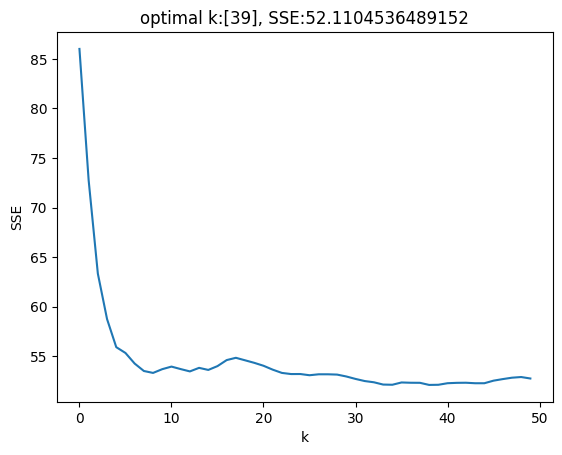

In [ ]:
# trying to find optimal k

k_bar = 50
k_grid = np.arange(1,k_bar)
SSE = np.zeros(k_bar)

for k in range(k_bar):
    knn = KNeighborsRegressor(n_neighbors=k+1)
    predictor = knn.fit(X_train,y_train)
    y_hat = knn.predict(X_test)
    SSE[k] = np.sum( (y_test-y_hat)**2 )

SSE_min = np.min(SSE)
min_index = np.where(SSE==SSE_min)
k_star = k_grid[min_index]

plt.plot(np.arange(0,k_bar),SSE) # Plot accuracy by k
plt.xlabel("k")
plt.title(f"optimal k:{k_star}, SSE:{SSE_min}")
plt.ylabel('SSE')
plt.show()

In [ ]:
# RESOURCES
# https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a

knn = KNeighborsRegressor(n_neighbors = 39) # optimal k is 39
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=39)

In [ ]:
knn.predict(X_test)[0:5]

array([0.        , 0.12820513, 0.07692308, 0.20512821, 0.15384615])

In [ ]:
knn.score(X_test, y_test)

0.05192303430452472

In [ ]:
real_data_x_test = test_data.loc[:,correlated_columns]
real_data_y_test = test_data['TEN_YEAR_CHD']

In [ ]:
knn.predict(real_data_x_test)[0:]

array([0.07692308, 0.1025641 , 0.05128205, 0.        , 0.1025641 ,
       0.05128205, 0.07692308, 0.02564103, 0.02564103, 0.12820513,
       0.07692308, 0.1025641 , 0.20512821, 0.05128205, 0.05128205,
       0.12820513, 0.07692308, 0.12820513, 0.        , 0.15384615,
       0.12820513, 0.07692308, 0.28205128, 0.1025641 , 0.07692308,
       0.07692308, 0.17948718, 0.05128205, 0.02564103, 0.05128205,
       0.17948718, 0.05128205, 0.12820513, 0.15384615, 0.12820513,
       0.        , 0.        , 0.17948718, 0.17948718, 0.07692308,
       0.17948718, 0.02564103, 0.12820513, 0.05128205, 0.23076923,
       0.02564103, 0.23076923, 0.07692308, 0.1025641 , 0.        ,
       0.17948718, 0.17948718, 0.02564103, 0.12820513, 0.05128205,
       0.02564103, 0.15384615, 0.        , 0.1025641 , 0.        ,
       0.20512821, 0.02564103, 0.05128205, 0.05128205, 0.05128205,
       0.12820513, 0.1025641 , 0.05128205, 0.07692308, 0.02564103,
       0.07692308, 0.05128205, 0.1025641 , 0.15384615, 0.12820

In [ ]:
knn.score(real_data_x_test, real_data_y_test)

0.05853694688729172

## Linear Regression Model

When performing linear regression, the four most strongly correlated variables were looked at, as it was found that the use of more variables overfitted the data.

A few different combinations of these variables with regressions with and without and intercept were performed. The regression using all 4 of these variables, with and intercept, was found to be the best with and R-squared values of 0.081 and a RMSE fo 0.34.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_linear = pd.read_csv('fhs_train.csv')
df_linear = df_linear.drop('Unnamed: 0', axis=1)
# df_linear = df_linear.loc[:, ['age', 'totChol', 'TenYearCHD']]
# df_linear = df_linear.loc[:, ['age', 'prevalentHyp', 'sysBP', 'glucose', 'diaBP', 'totChol', 'TenYearCHD']]
df_linear

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,58,1.0,0,0.0,0.0,0,0,0,220.0,143.0,104.0,29.85,75,87.0,1
1,0,40,1.0,1,15.0,0.0,0,0,0,199.0,122.0,82.0,22.16,85,77.0,0
2,0,52,1.0,0,0.0,0.0,0,0,0,275.0,112.0,71.0,25.68,80,NaN,0
3,1,38,2.0,1,43.0,0.0,0,1,0,170.0,130.0,94.0,23.90,110,75.0,0
4,0,43,1.0,0,0.0,0.0,0,0,0,202.0,124.0,92.0,21.26,75,74.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3175,1,36,4.0,0,0.0,0.0,0,0,0,234.0,133.0,88.0,26.78,58,100.0,0
3176,1,47,1.0,1,20.0,0.0,0,0,0,284.0,137.0,91.0,27.33,73,61.0,0
3177,1,52,2.0,0,0.0,0.0,0,0,0,310.0,135.0,89.0,29.51,64,74.0,1
3178,0,48,1.0,1,5.0,0.0,0,0,0,296.0,117.0,73.0,24.59,70,78.0,0


In [ ]:
df_test_linear = pd.read_csv('fhs_test.csv')
df_test_linear = df_test_linear.drop('Unnamed: 0', axis=1)
# df_test_linear = df_test_linear.loc[:, ['age', 'totChol', 'TenYearCHD']]
# df_test_linear = df_test_linear.loc[:, ['age', 'prevalentHyp', 'sysBP', 'glucose', 'diaBP', 'totChol', 'TenYearCHD']]
df_test_linear

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,58,1.0,1,20.0,0.0,0,0,0,NaN,126.0,77.0,30.08,78.0,NaN,0
1,0,51,3.0,0,0.0,0.0,0,0,0,264.0,135.0,83.0,26.68,60.0,74.0,0
2,0,44,2.0,1,9.0,0.0,0,1,0,NaN,147.5,96.0,30.57,78.0,NaN,1
3,0,40,2.0,1,20.0,0.0,0,0,0,271.0,138.5,88.0,27.24,80.0,NaN,1
4,1,58,2.0,1,20.0,0.0,0,0,0,207.0,110.0,80.0,23.55,78.0,78.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1055,0,63,2.0,0,0.0,0.0,0,1,0,184.0,196.0,101.0,28.27,86.0,82.0,1
1056,1,42,4.0,0,0.0,0.0,0,0,0,195.0,112.0,74.5,23.37,58.0,110.0,0
1057,1,63,3.0,0,0.0,0.0,0,1,0,161.0,196.0,102.0,28.43,56.0,88.0,0
1058,0,55,3.0,0,0.0,0.0,0,0,0,260.0,136.5,87.5,25.41,75.0,60.0,0


In [ ]:
def fill_nas(df):
    columns = df.columns
    for column in columns:
        df[column] = df[column].fillna(df[column].mode()[0])
    return df

In [ ]:
# Handle NAs by dropping:
# df_linear = df_linear.dropna()
df_linear = fill_nas(df_linear)
# df_test_linear = df_test_linear.dropna()
df_test_linear = fill_nas(df_test_linear)

In [ ]:
df_linear['totChol_log'] = np.log(df_linear['totChol'])
df_linear['glucose_log'] = np.log(df_linear['glucose'])
df_linear['heartRate_log'] = np.log(df_linear['heartRate'])
df_linear['BMI_log'] = np.log(df_linear['BMI'])
df_linear['diaBP_log'] = np.log(df_linear['diaBP'])
df_linear['sysBP_log'] = np.log(df_linear['sysBP'])
# df_linear['age_log'] = np.log(df_linear['age'])

df_test_linear['totChol_log'] = np.log(df_test_linear['totChol'])
df_test_linear['glucose_log'] = np.log(df_test_linear['glucose'])
df_test_linear['heartRate_log'] = np.log(df_test_linear['heartRate'])
df_test_linear['BMI_log'] = np.log(df_test_linear['BMI'])
df_test_linear['diaBP_log'] = np.log(df_test_linear['diaBP'])
df_test_linear['sysBP_log'] = np.log(df_test_linear['sysBP'])
# df_test_linear['age_log'] = np.log(df_test_linear['age'])

In [ ]:
## Linear Regression:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Preprocess data for random forest:
X_train = df_linear.drop('TenYearCHD',axis=1)
y_train = df_linear['TenYearCHD']
X_test = df_test_linear.drop('TenYearCHD',axis=1)
y_test = df_test_linear['TenYearCHD']
print(X)

#scaled_X = StandardScaler().fit_transform(X.values)
min_max_scaler = preprocessing.MinMaxScaler()
# Create an object to transform the data to fit minmax processor
X_train_scaled = min_max_scaler.fit_transform(X_train)
X_test_scaled = min_max_scaler.transform(X_test)

# X_train = np.log(X_train)
# X_test = np.log(X_test)

# Fit model:
model = LinearRegression() # Build a random forest model
# rf = model.fit(X_train,y_train) # Fit the rf model
# y_hat = rf.predict(X_test) # Model predictions
lm = model.fit(X_train_scaled,y_train) # Fit the rf model
y_hat = lm.predict(X_test_scaled) # Model predictions
# y_hat = lm.predict(X_test.values) # Model predictions

SSE = np.sum( (y_test - y_hat)**2 )
TSS = np.sum( (y_test - np.mean(y) )**2 )
rsq = 1 - SSE/TSS
print(rsq)

      sex  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0       1   58        1.0              0         0.0     0.0                0   
1       0   40        1.0              1        15.0     0.0                0   
3       1   38        2.0              1        43.0     0.0                0   
4       0   43        1.0              0         0.0     0.0                0   
6       0   54        1.0              0         0.0     0.0                0   
...   ...  ...        ...            ...         ...     ...              ...   
3174    0   54        2.0              0         0.0     0.0                0   
3175    1   36        4.0              0         0.0     0.0                0   
3176    1   47        1.0              1        20.0     0.0                0   
3177    1   52        2.0              0         0.0     0.0                0   
3178    0   48        1.0              1         5.0     0.0                0   

      prevalentHyp  diabete

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_linear = pd.read_csv('fhs_train.csv')
df_linear = df_linear.drop('Unnamed: 0', axis=1)
df_linear = df_linear.loc[:, ['education', 'age', 'prevalentHyp', 'sysBP', 'glucose', 'diaBP', 'totChol', 'TenYearCHD']]
df_test_linear = pd.read_csv('fhs_test.csv')
df_test_linear = df_test_linear.drop('Unnamed: 0', axis=1)
df_test_linear = df_test_linear.loc[:, ['education', 'age', 'prevalentHyp', 'sysBP', 'glucose', 'diaBP', 'totChol', 'TenYearCHD']]

def fill_nas(df):
    columns = df.columns
    for column in columns:
        df[column] = df[column].fillna(df[column].mode()[0])
    return df

df_linear = fill_nas(df_linear)
df_test_linear = fill_nas(df_test_linear)

df_linear['totChol_log'] = np.log(df_linear['totChol'])
df_linear['glucose_log'] = np.log(df_linear['glucose'])
df_linear['diaBP_log'] = np.log(df_linear['diaBP'])
df_linear['sysBP_log'] = np.log(df_linear['sysBP'])
df_linear['age_log'] = np.log(df_linear['age'])
df_linear['education_log'] = np.log(df_linear['education'])

df_test_linear['totChol_log'] = np.log(df_test_linear['totChol'])
df_test_linear['glucose_log'] = np.log(df_test_linear['glucose'])
df_test_linear['diaBP_log'] = np.log(df_test_linear['diaBP'])
df_test_linear['sysBP_log'] = np.log(df_test_linear['sysBP'])
df_test_linear['age_log'] = np.log(df_test_linear['age'])
df_test_linear['education_log'] = np.log(df_test_linear['education'])

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import numpy as np

X_train = df_linear.drop('TenYearCHD',axis=1)
y_train = df_linear['TenYearCHD']
X_test = df_test_linear.drop('TenYearCHD',axis=1)
y_test = df_test_linear['TenYearCHD']

model = LinearRegression() # Build a random forest model
rf = model.fit(X_train,y_train) # Fit the rf model
y_hat = rf.predict(X_test) # Model predictions

SSE = np.sum( (y_test - y_hat)**2 )
TSS = np.sum( (y_test - np.mean(y) )**2 )
rsq = 1 - SSE/TSS
print(rsq)

0.0863423026452863


# Decision Tree Model

# Random Forest Model

The random forest model was run on all of the vairables as we wanted to see if the variables the random forest deteremines as important match the highly correlated key variables. The key variables are age, prevalentHyp, sysBP, and diaBP. However, the random forest determined that the most important variables to its models are BMI, sysBP, totChol, age, glucose, diaBP, and heartRate, all with an importance between 0.09 and 0.15. Age, sysBP, and diaBP were both ranked highly, but prevalentHyp was ranked significantly lower in the random forest.


For this model, the same train test split was used as the other models and then all NAs were dropped. The random forest model had a R squared value of 0.035, which is a little lower than all of the other models attempted, but in the same range.

In [3]:
# Import libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

In [4]:
# Import dataset
#! git clone https://github.com/DS3001/project_chd
data = pd.read_csv('/content/project_chd/fhs_train.csv')
data = data.drop("Unnamed: 0", axis = 1)
test_data = pd.read_csv('/content/project_chd/fhs_test.csv')
test_data = test_data.drop("Unnamed: 0", axis = 1)

Cloning into 'project_chd'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 16 (delta 6), reused 6 (delta 4), pack-reused 6
Receiving objects: 100% (16/16), 754.81 KiB | 11.27 MiB/s, done.
Resolving deltas: 100% (6/6), done.


In [5]:
# Drop NAs
data = data.dropna()
test_data = test_data.dropna()

In [6]:
# Split data into train/test:
X_train = data.drop(['TenYearCHD'],axis=1)
y_train = data['TenYearCHD']
X_test = test_data.drop(['TenYearCHD'],axis=1)
y_test = test_data['TenYearCHD']

In [7]:
# Fit model:
model = RandomForestRegressor() # Build a random forest model
rf = model.fit(X_train,y_train) # Fit the rf model

# Make predictions:
y_hat_rf = rf.predict(X_test) # Model predictions

<Axes: xlabel='TenYearCHD'>

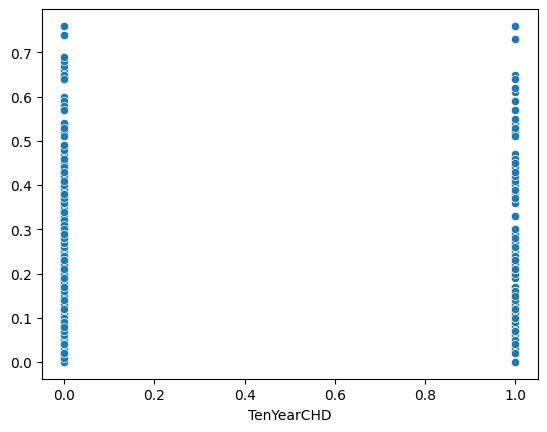

In [8]:
# Scatterplot of predicted v. actual:
sns.scatterplot(x=y_test, y=y_hat_rf) # Predicted v Actual

<Axes: xlabel='TenYearCHD', ylabel='Density'>

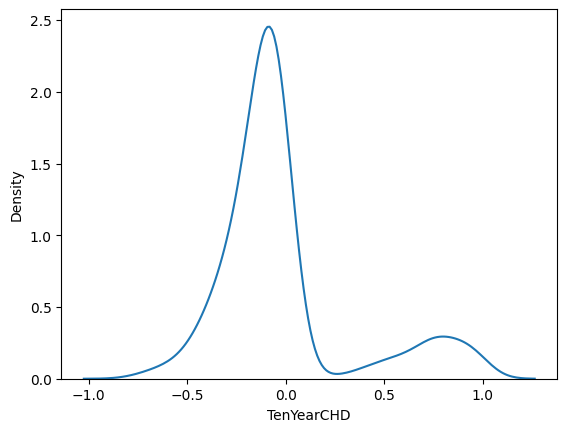

In [9]:
# Residual plot:
residual = y_test - y_hat_rf
sns.kdeplot(x=residual)

In [10]:
rf.score(X_test,y_test) # Rsq measure

0.037673876753342994

<Axes: >

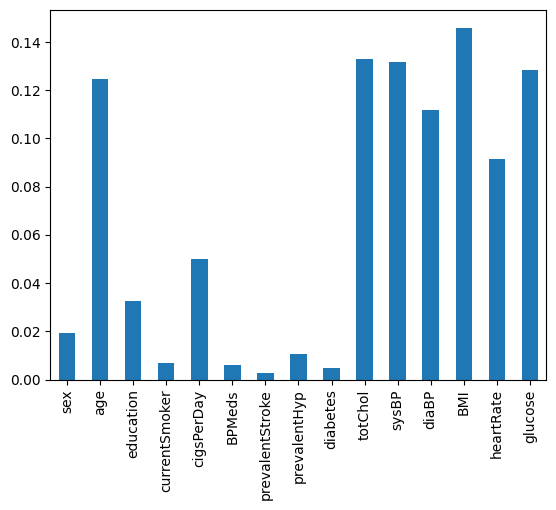

In [11]:
# Variable importance plot:
forest_importances = pd.Series(rf.feature_importances_, index=X_train.columns )
forest_importances.plot.bar()